# Линейные модели в машинном обучении

hjhhkhkh

# Этап 1.Загрузка данных 


In [1]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns
from typing import List
from scipy.stats import shapiro



In [2]:
try:
    df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
    df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')
except Exception:
    df_ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';')
    df_ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';')
    df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';')

In [3]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [8]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076"
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081"
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074"
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061"
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074"


# Этап 2. Предобработка данных 

In [9]:
df_ferma_main  = df_ferma_main.rename(columns={'порода папы_быка':'Порода папы быка'})

дубли

In [10]:
data_frame = [df_ferma_main, df_ferma_dad, df_cow_buy]

for data in data_frame:
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
    #создаем словарь, где ключ - название переменной, чтобы название переменной передать в f-строку
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'Количество дубликатов в датафрейме {data_name}: {data.duplicated().sum()}')
    

Количество дубликатов в датафрейме df_ferma_main: 0
Количество дубликатов в датафрейме df_ferma_dad: 0
Количество дубликатов в датафрейме df_cow_buy: 0


проверим неявные дубликаты 

In [11]:
columns = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']

for column in columns:
    unique_values = df_ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')


Уникальные значения в колонке Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке Тип пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в колонке Порода папы быка: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в колонке Вкус молока: ['вкусно' 'не вкусно']
Уникальные значения в колонке Возраст: ['более_2_лет' 'менее_2_лет']


In [12]:
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].replace('Равнинные','Равнинное')
df_ferma_main['Порода папы быка'] = df_ferma_main['Порода папы быка'].replace('Айдиалл','Айдиал')


пропуски

In [13]:
for data in data_frame:
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'прошущенные значения в {data_name}:\n{data.isnull().sum().sort_values()}')
    print()

прошущенные значения в df_ferma_main:
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
Порода папы быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

прошущенные значения в df_ferma_dad:
id          0
Имя Папы    0
dtype: int64

прошущенные значения в df_cow_buy:
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
dtype: int64



In [14]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     629 non-null    int64 
 1   Удой, кг                               629 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    object
 3   Сырой протеин, г                       629 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    object
 5   Порода                                 629 non-null    object
 6   Тип пастбища                           629 non-null    object
 7   Порода папы быка                       629 non-null    object
 8   Жирность,%                             629 non-null    object
 9   Белок,%                                629 non-null    object
 10  Вкус молока                            629 non-null    object
 11  Возраст            

In [15]:
df_ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [16]:
def replace_comma_with_dot(df_name: str, columns: List[str]):
    df = globals()[df_name]  # Получение датафрейма по его названию
    for column in columns:
        df[column] = df[column].apply(lambda x: str(x).replace(',', '.')).astype(float)

In [17]:
columns_to_change_type = ['ЭКЕ (Энергетическая кормовая единица)', 
                          'Сырой протеин, г', 'Жирность,%', 'Белок,%', 
                          'СПО (Сахаро-протеиновое соотношение)']

replace_comma_with_dot('df_ferma_main', columns_to_change_type)

In [18]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    float64
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   Порода папы быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [19]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [20]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   16 non-null     object
 1   Тип пастбища             16 non-null     object
 2   порода папы_быка         16 non-null     object
 3   Имя_папы                 16 non-null     object
 4   Текущая_жирность,%       16 non-null     object
 5   Текущий_уровень_белок,%  16 non-null     object
dtypes: object(6)
memory usage: 896.0+ bytes


In [21]:
columns_to_change_type = ['Текущая_жирность,%', 'Текущий_уровень_белок,%']
replace_comma_with_dot('df_cow_buy', columns_to_change_type)

In [22]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   16 non-null     object 
 1   Тип пастбища             16 non-null     object 
 2   порода папы_быка         16 non-null     object 
 3   Имя_папы                 16 non-null     object 
 4   Текущая_жирность,%       16 non-null     float64
 5   Текущий_уровень_белок,%  16 non-null     float64
dtypes: float64(2), object(4)
memory usage: 896.0+ bytes


# Этап 3. Исследовательский анализ данных

In [23]:
def create_histogram(data, column, title, bins=50):
    plt.figure(figsize=(12, 6))
    sns.set()
    sns.histplot(data=data, x=column, kde=True, bins=bins)
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()


In [24]:
def create_barplot(data, column, tittle):
    plt.figure(figsize=(10, 6))
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title(tittle)
    plt.xlabel(f'{column}')
    plt.ylabel(f'количество {column}')

Проанализируем удой 

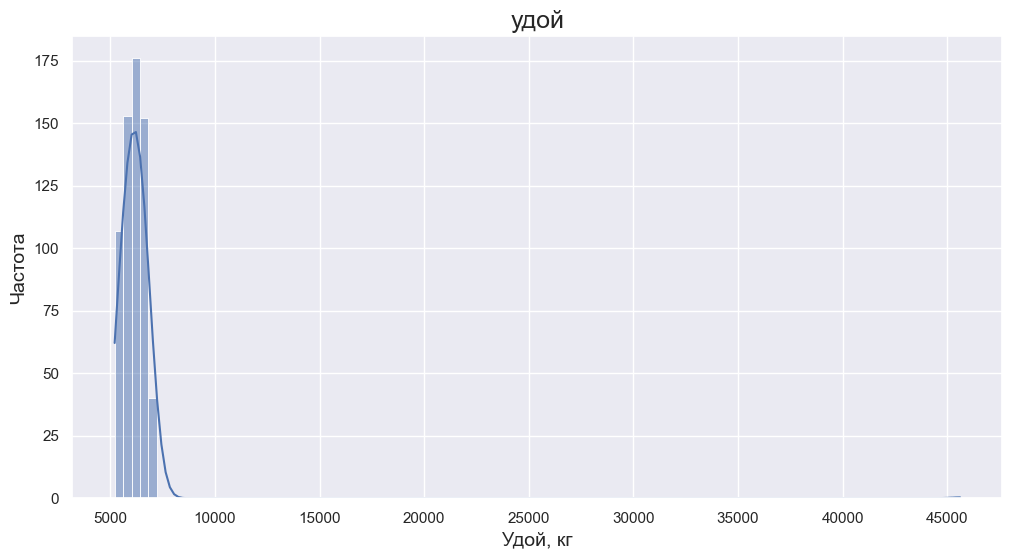

In [25]:
create_histogram(df_ferma_main, 'Удой, кг', 'удой', 100)

In [26]:
df_ferma_main = df_ferma_main[df_ferma_main['Удой, кг'] <= 10000]


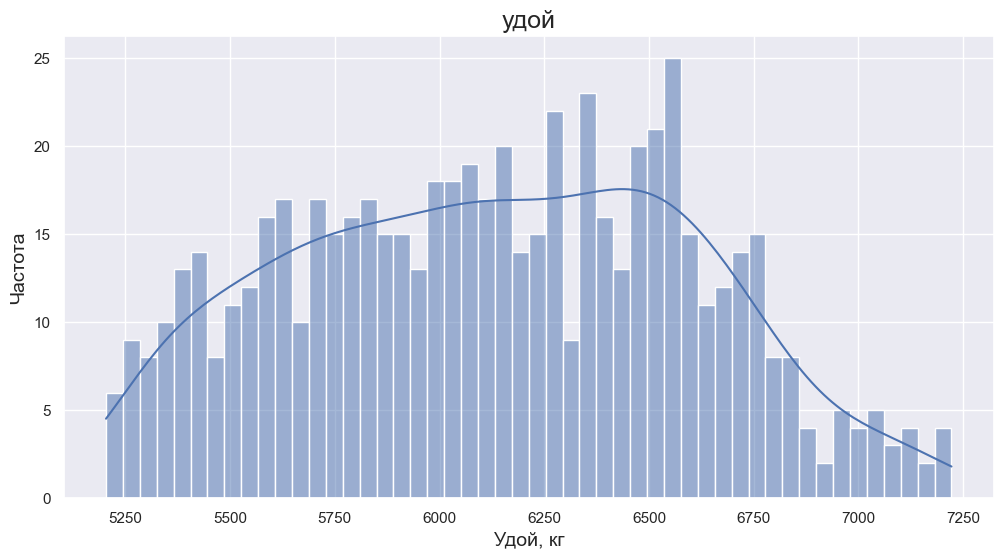

In [27]:
create_histogram(df_ferma_main, 'Удой, кг', 'удой')

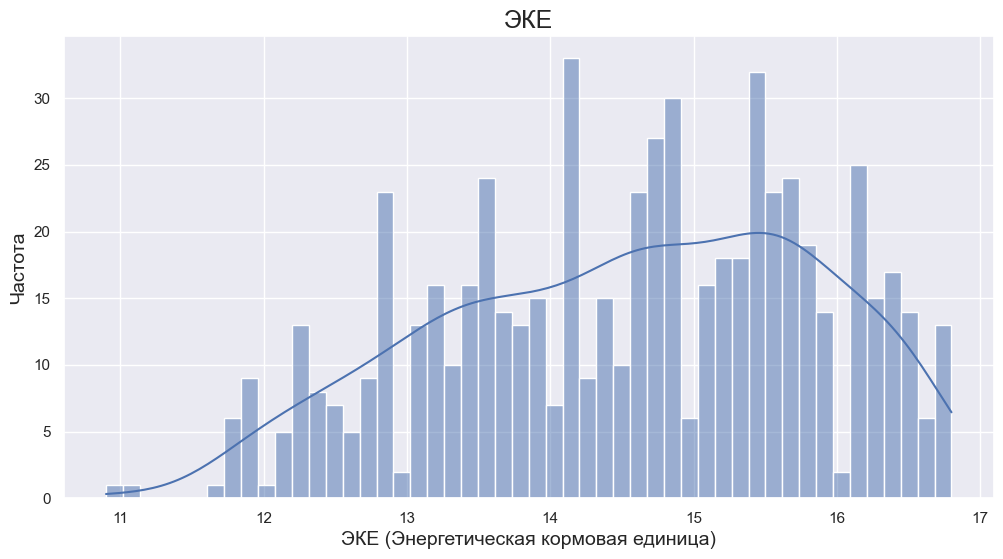

In [28]:
create_histogram(df_ferma_main, 'ЭКЕ (Энергетическая кормовая единица)', 'ЭКЕ')

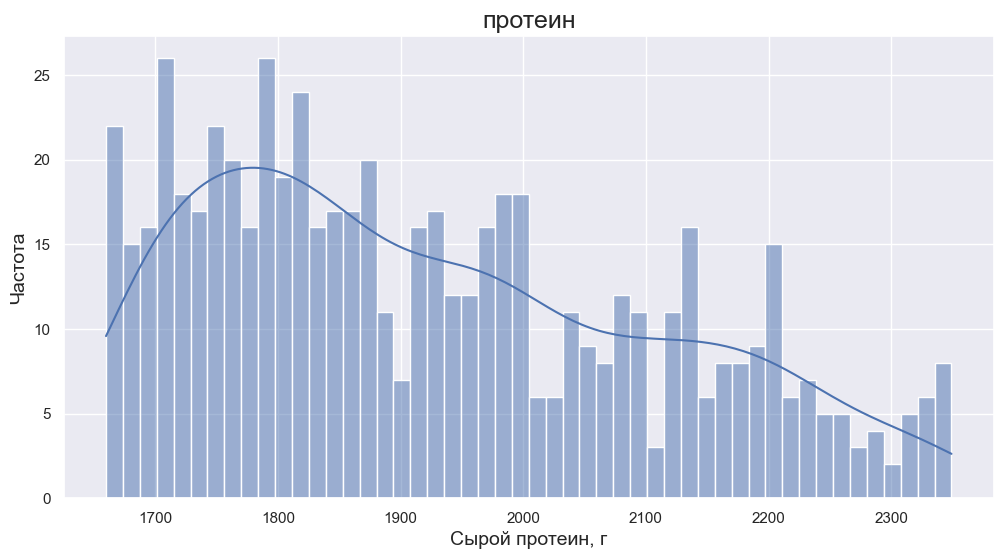

In [29]:
create_histogram(df_ferma_main, 'Сырой протеин, г', 'протеин')

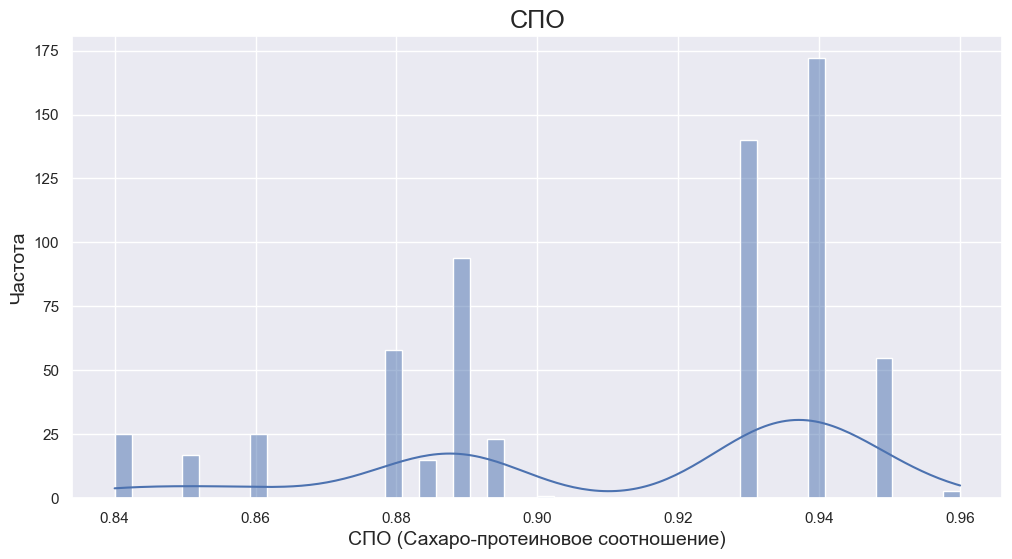

In [30]:
create_histogram(df_ferma_main, 'СПО (Сахаро-протеиновое соотношение)', 'СПО')

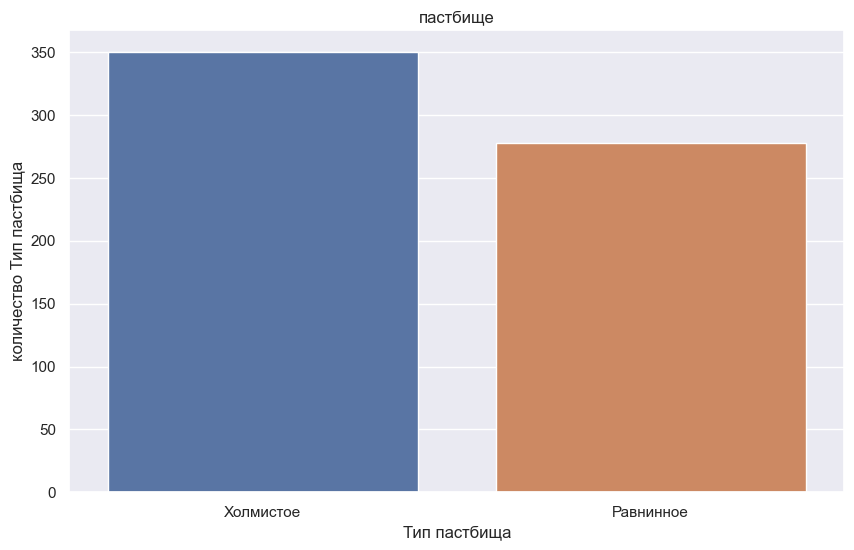

In [31]:
create_barplot(df_ferma_main, 'Тип пастбища', 'пастбище')

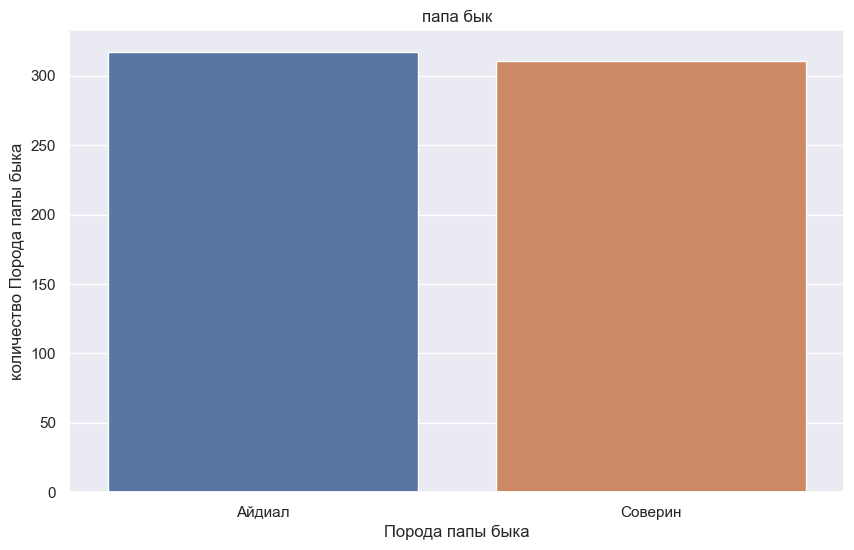

In [32]:
create_barplot(df_ferma_main, 'Порода папы быка', 'папа бык')

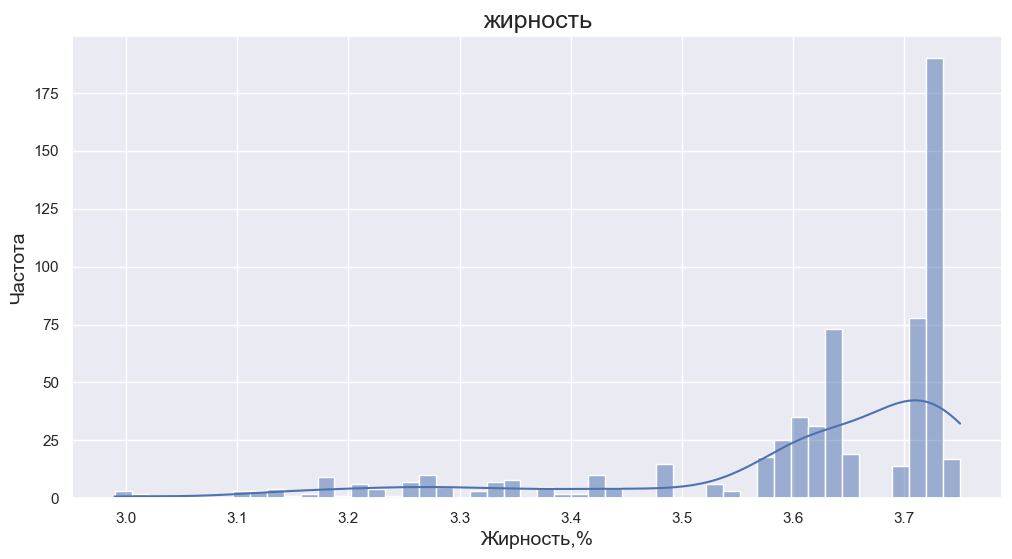

In [33]:
create_histogram(df_ferma_main, 'Жирность,%', 'жирность')

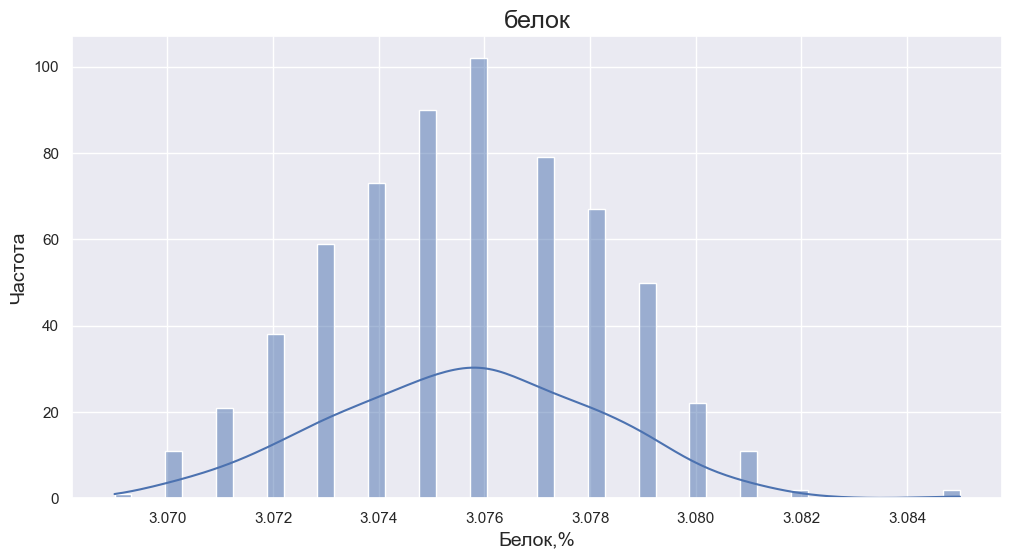

In [34]:
create_histogram(df_ferma_main, 'Белок,%', 'белок')

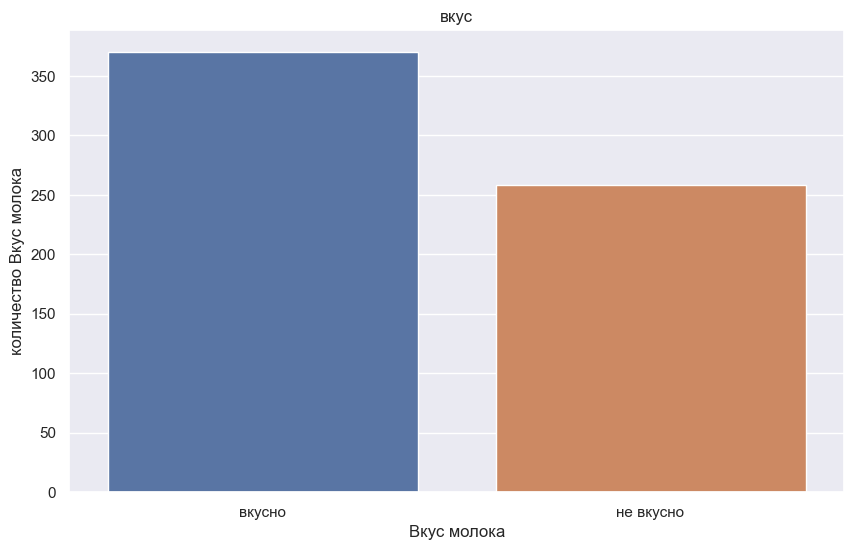

In [35]:
create_barplot(df_ferma_main, 'Вкус молока', 'вкус')

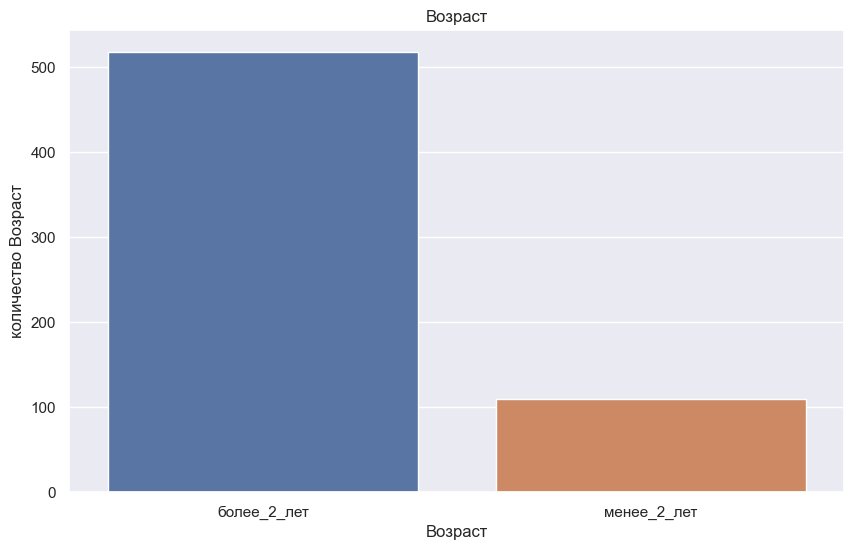

In [36]:
create_barplot(df_ferma_main, 'Возраст', 'Возраст')

порода

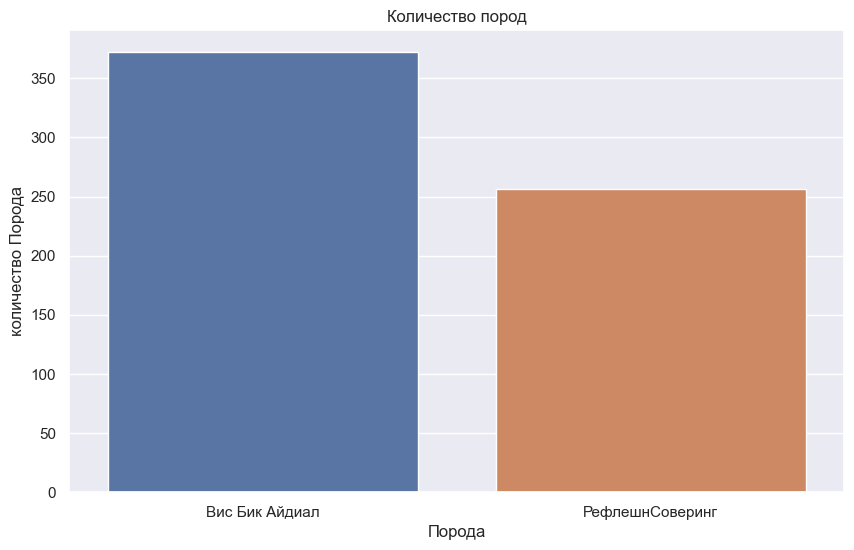

In [37]:
create_barplot(df_ferma_main, 'Порода', 'Количество пород')

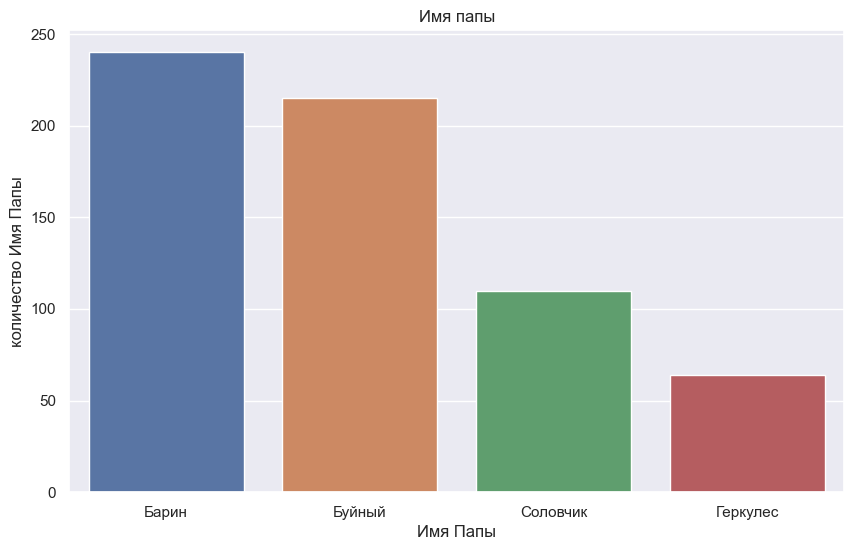

In [38]:
create_barplot(df_ferma_dad, 'Имя Папы', 'Имя папы')

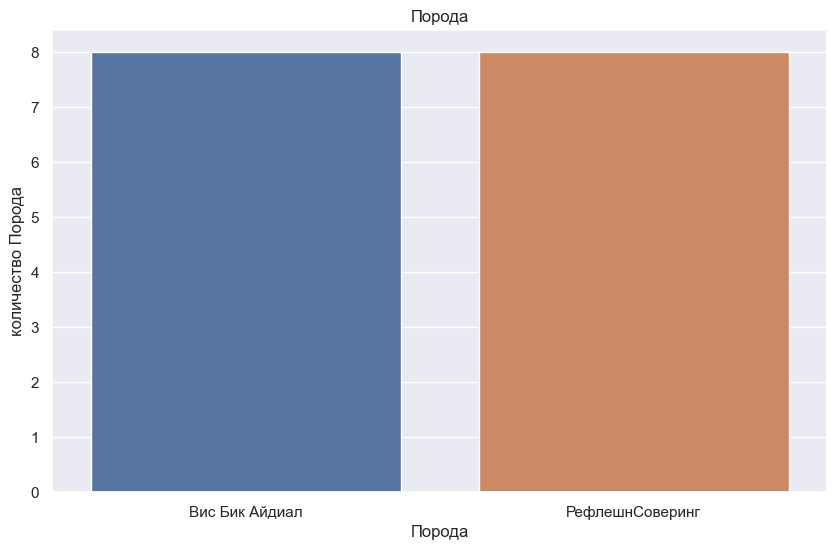

In [39]:
create_barplot(df_cow_buy, 'Порода', 'Порода')

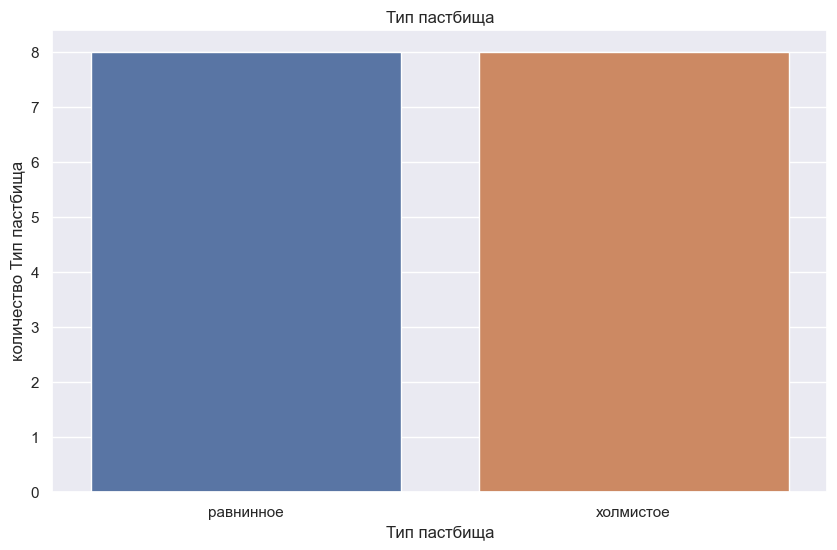

In [40]:
create_barplot(df_cow_buy, 'Тип пастбища', 'Тип пастбища')

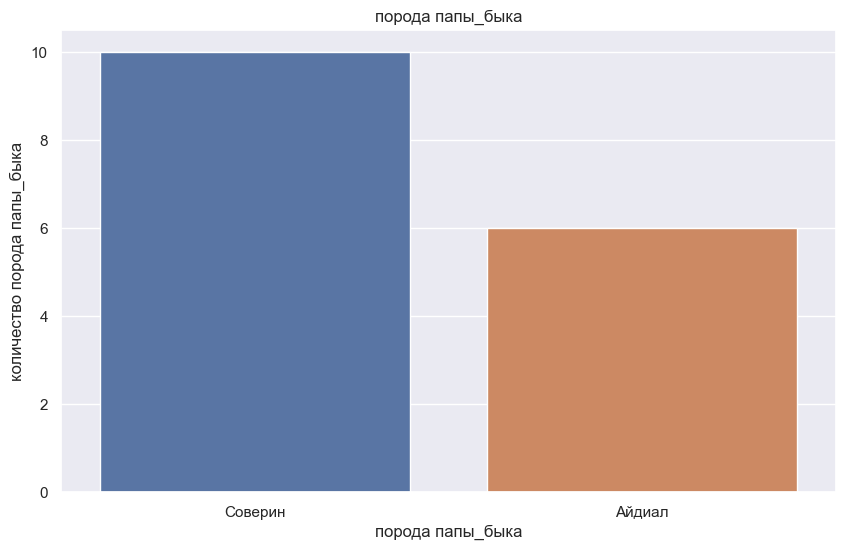

In [41]:
create_barplot(df_cow_buy, 'порода папы_быка', 'порода папы_быка')

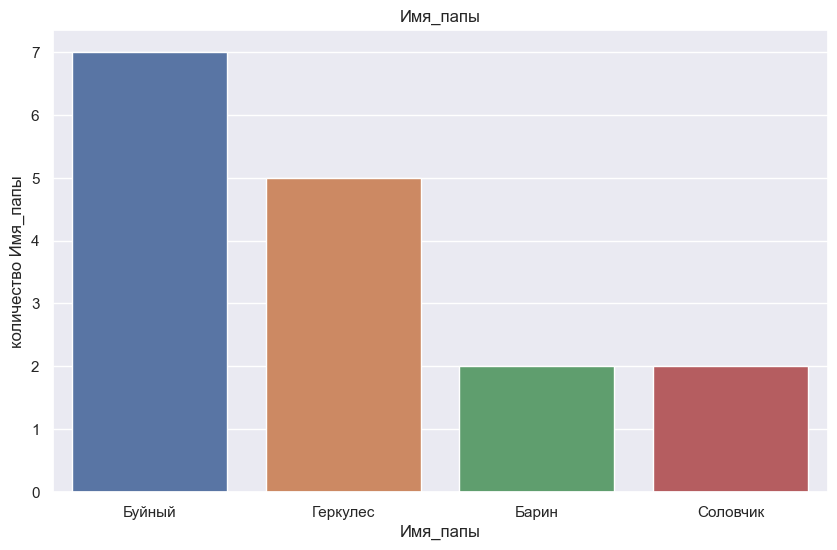

In [42]:
create_barplot(df_cow_buy, 'Имя_папы', 'Имя_папы')

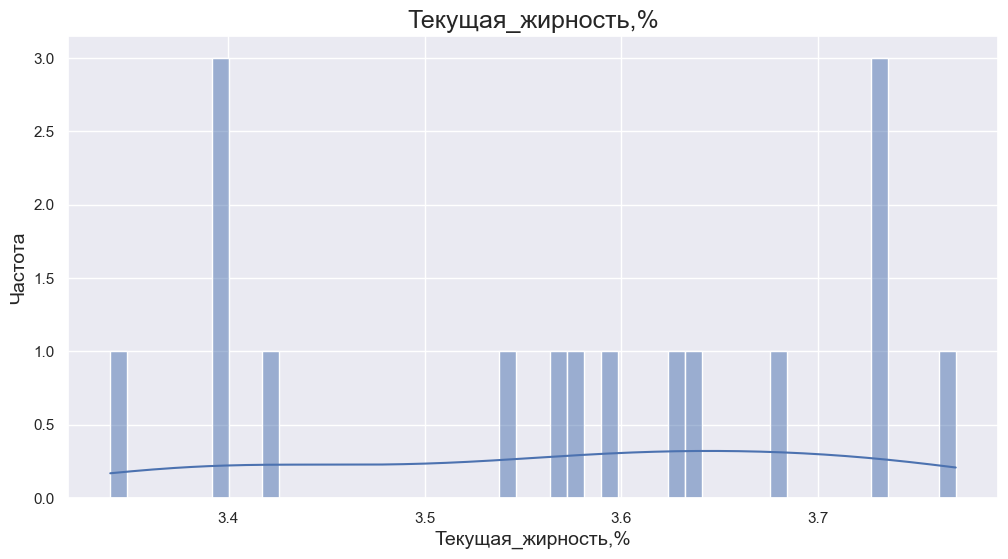

In [43]:
create_histogram(df_cow_buy, 'Текущая_жирность,%', 'Текущая_жирность,%')

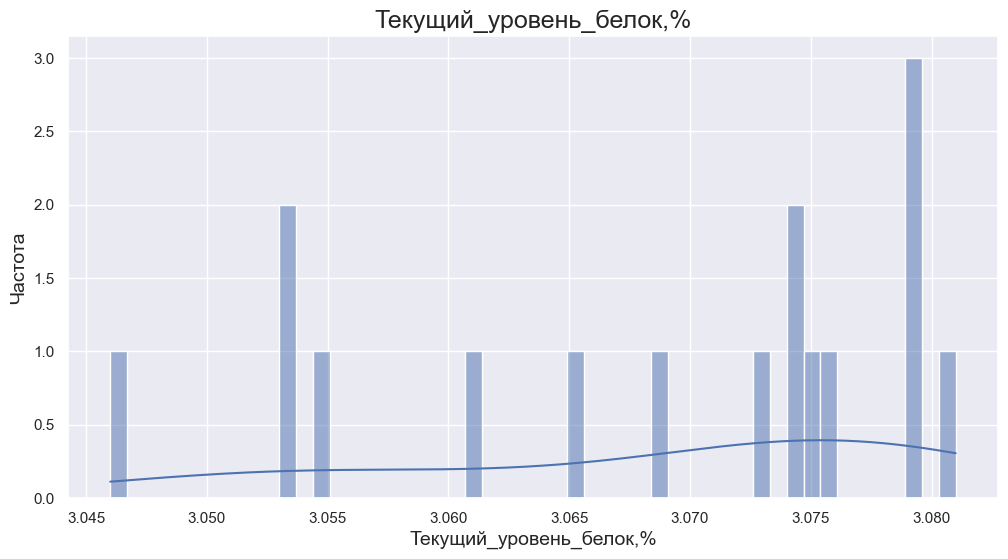

In [44]:
create_histogram(df_cow_buy, 'Текущий_уровень_белок,%', 'Текущий_уровень_белок,%')

# Этап 4. Корреляция

In [45]:
df_ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [46]:
columns_for_corr = ['ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
       'Жирность,%', 'Белок,%']

In [47]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     628 non-null    int64  
 1   Удой, кг                               628 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  628 non-null    float64
 3   Сырой протеин, г                       628 non-null    float64
 4   СПО (Сахаро-протеиновое соотношение)   628 non-null    float64
 5   Порода                                 628 non-null    object 
 6   Тип пастбища                           628 non-null    object 
 7   Порода папы быка                       628 non-null    object 
 8   Жирность,%                             628 non-null    float64
 9   Белок,%                                628 non-null    float64
 10  Вкус молока                            628 non-null    object 
 11  Возрас

In [48]:
def shapiro_test(data, column):
    statistic, p_value = shapiro(data[column])

    # Печать результата теста
    alpha = 0.05  # Уровень значимости
    print(f'Результат теста Шапиро-Уилка для столбца {column}:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}')
    if p_value > alpha:
        print('Распределение данных является нормальным.')
    else:
        print('Распределение данных не является нормальным.')
    

In [49]:
shapiro_test(df_ferma_main, 'Удой, кг')

Результат теста Шапиро-Уилка для столбца Удой, кг:
Статистика теста: 0.9813497066497803
p-значение: 3.5405690823608893e-07
Распределение данных не является нормальным.


In [50]:
for col_name in columns_for_corr:
    shapiro_test(df_ferma_main, col_name)
    print()

Результат теста Шапиро-Уилка для столбца ЭКЕ (Энергетическая кормовая единица):
Статистика теста: 0.9713218212127686
p-значение: 9.629514963194197e-10
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Сырой протеин, г:
Статистика теста: 0.9437043070793152
p-значение: 1.0714618652225578e-14
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца СПО (Сахаро-протеиновое соотношение):
Статистика теста: 0.85552579164505
p-значение: 1.5361221772382798e-23
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Жирность,%:
Статистика теста: 0.7418994307518005
p-значение: 4.189550639664007e-30
Распределение данных не является нормальным.

Результат теста Шапиро-Уилка для столбца Белок,%:
Статистика теста: 0.9831568002700806
p-значение: 1.22859341900039e-06
Распределение данных не является нормальным.



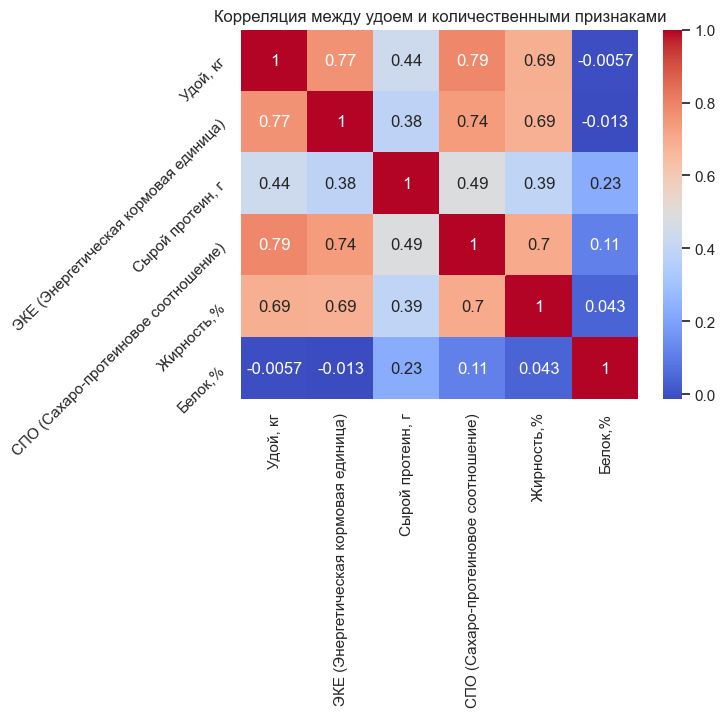

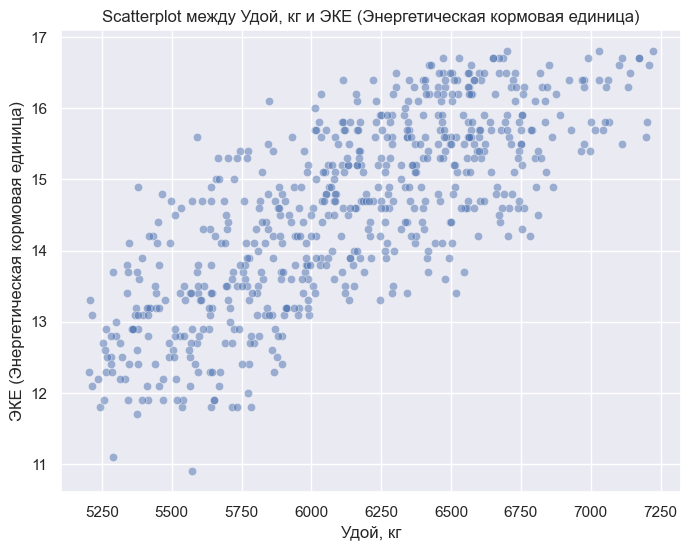

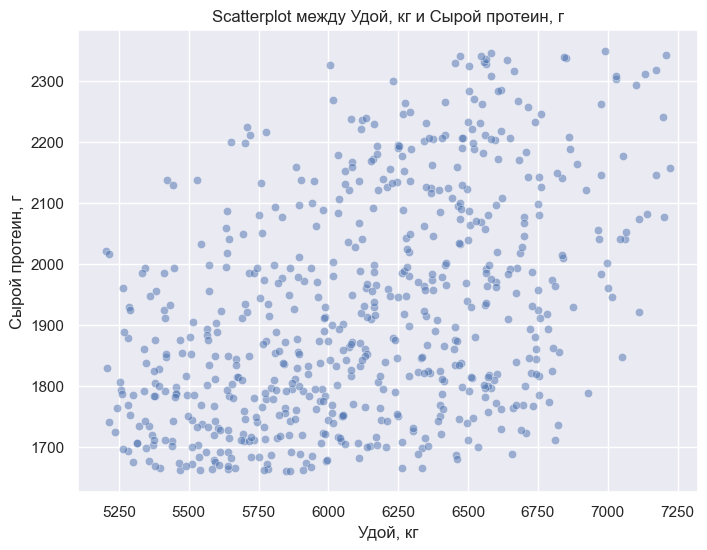

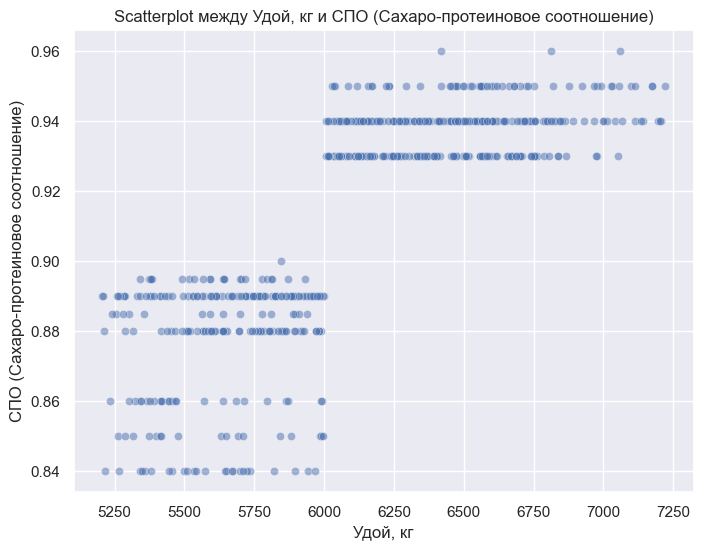

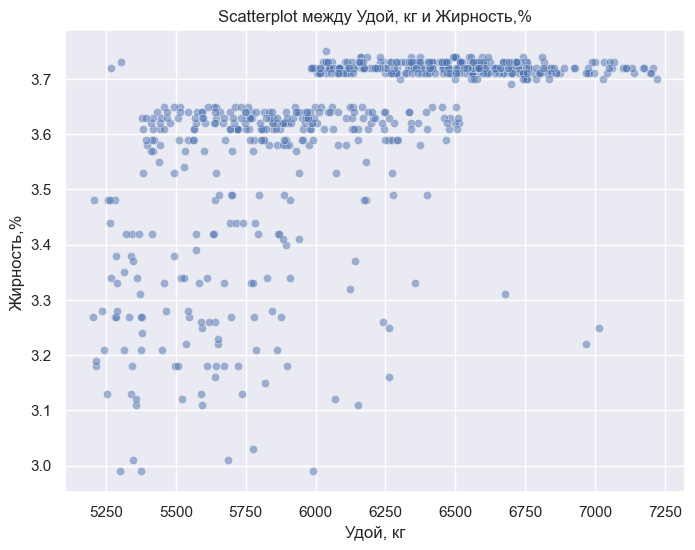

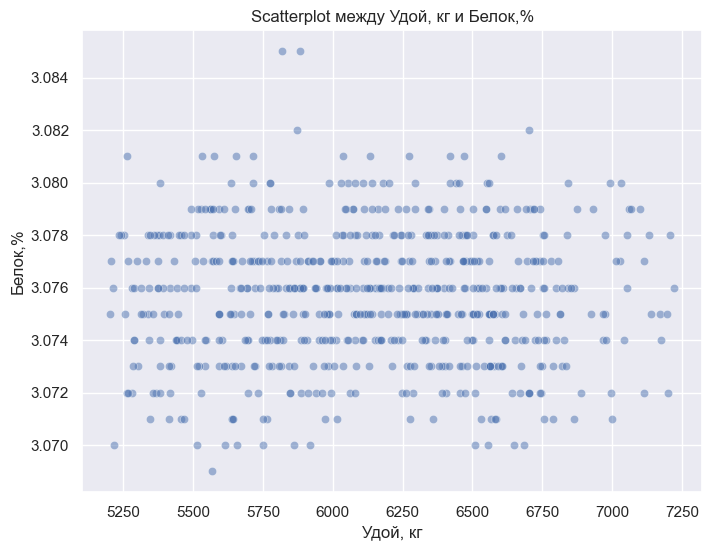

In [51]:
def calculate_correlation(df, target_column, columns_for_corr, method='spearman'):
    """
    input: df - датафрейм со значениями
           target_column - название целевого признака (столбца)
           columns_for_corr - список с названиями количественных признаков
           method - метод подсчета корреляции: 'spearman' (по умолчанию) или 'kendall'
    output: None
    description: Функция выполняет подсчет корреляции между целевым признаком
                 и количественными признаками с использованием заданного метода 
                 и строит тепловую карту.
    """
    corr_matrix = df[[target_column] + columns_for_corr].corr(method=method)
    
    # Построение тепловой карты
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.yticks(rotation=45)
    plt.title(f'Корреляция между удоем и количественными признаками')
    plt.show()

    for column in columns_for_corr:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=target_column, y=column, alpha=0.5)
        plt.title(f'Scatterplot между {target_column} и {column}')
        plt.xlabel(target_column)
        plt.ylabel(column)
        plt.show()


    

# Вызов функции с примерными данными

calculate_correlation(df_ferma_main, 'Удой, кг', columns_for_corr, method='spearman')

In [52]:
print('aa')

aa
